# Predvidjanje Bolesti Srca

## Priprema alata

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Scikit-learn modeli
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# Evaluacija modela
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Ucitavanje podataka


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HearthDiseaseDataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Istrazivanje podataka

Cilj ovog dela je da se upoznamo sa skupom podataka sa kojim radimo.

In [47]:
#informacije o tipovima
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [48]:
#broj redova i kolona
df.shape

(303, 14)

In [49]:
pd.set_option( "display.float_format", lambda x: "%.2f"%x )
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
sex,303.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
cp,303.00,0.97,1.03,0.00,0.00,1.00,2.00,3.00
trestbps,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
chol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
fbs,303.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
restecg,303.00,0.53,0.53,0.00,0.00,1.00,1.00,2.00
thalach,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
exang,303.00,0.33,0.47,0.00,0.00,0.00,1.00,1.00
oldpeak,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

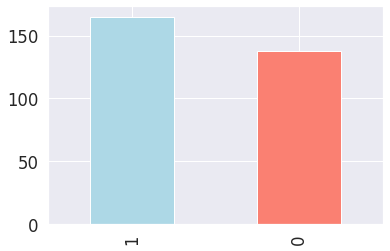

In [57]:
df['target'].value_counts().plot(kind = 'bar', color = ['lightblue','salmon'])

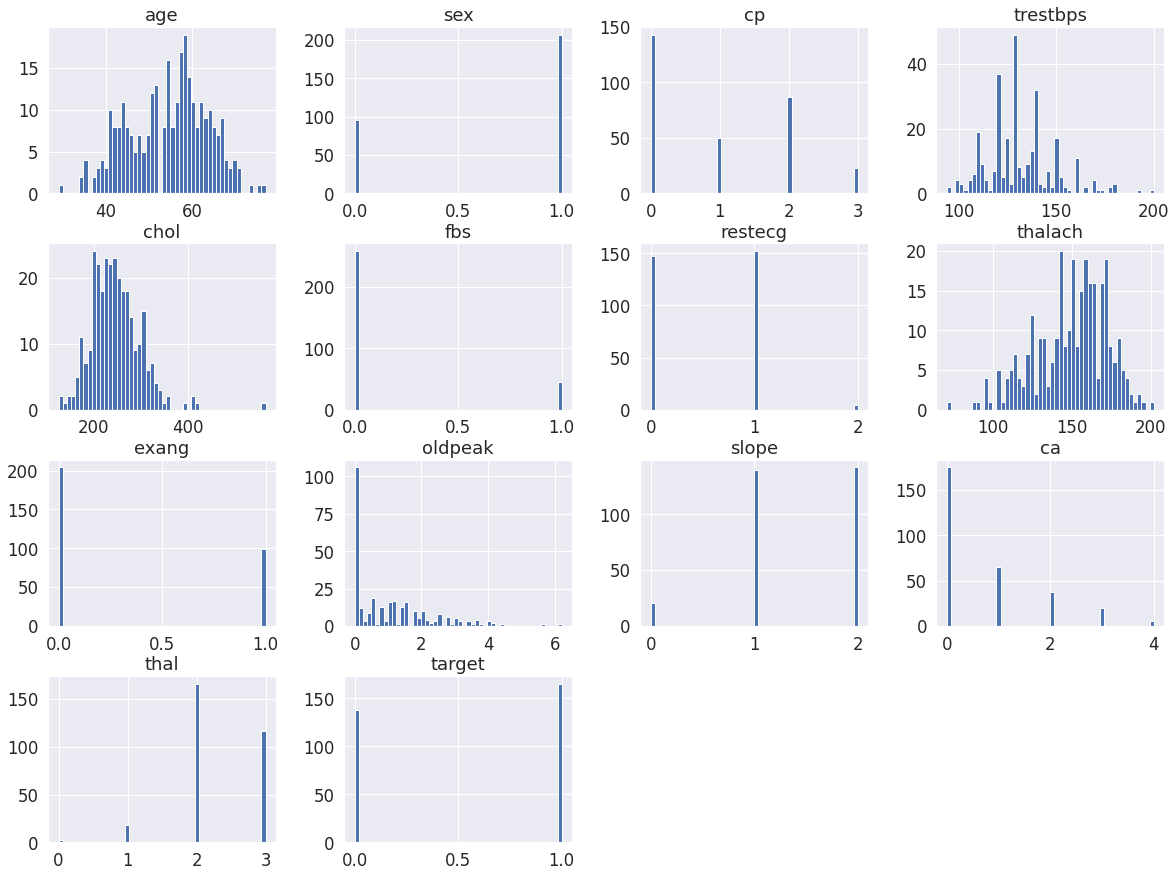

In [59]:
df.hist(bins = 50, figsize = (20, 15))

plt.show()

In [60]:
#ucestalost srcanih bolesti u odnosu na pol
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


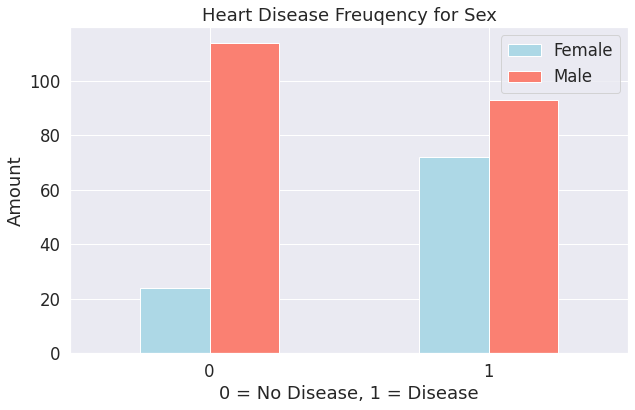

In [62]:

pd.crosstab(df.target, df.sex).plot(kind="bar",
figsize=(10,6),
color=["lightblue", "salmon"])
plt.title("Heart Disease Freuqency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

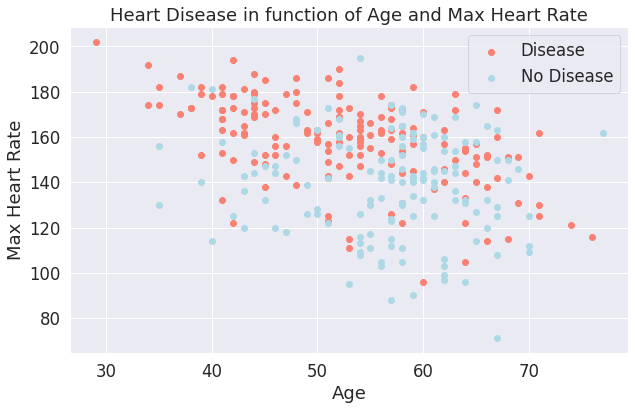

In [64]:
#odnos godina sa maksimalnim otkucajima srca
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
df.thalach[df.target==1],
c="salmon")
plt.scatter(df.age[df.target==0],
df.thalach[df.target==0],
c="lightblue");
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [66]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


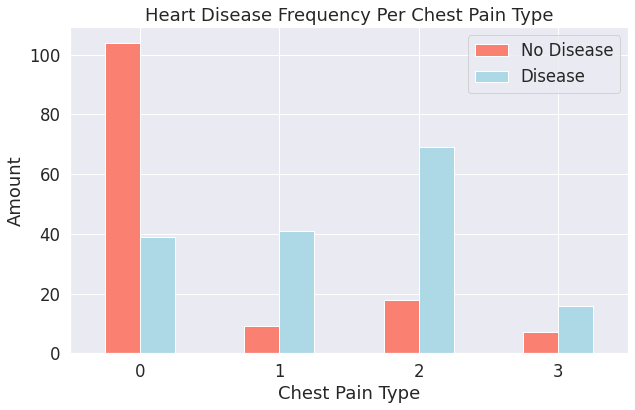

In [67]:
# Vizuelizacija prethodno dobijene informacije
pd.crosstab(df.cp, df.target).plot(kind="bar",
figsize=(10,6),
color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

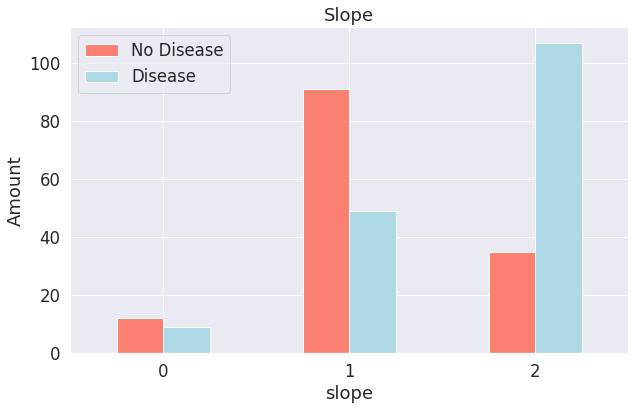

In [72]:
# 0:upsloping, 1:flat, 2:downsloping
pd.crosstab(df.slope, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])
plt.title("Slope")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

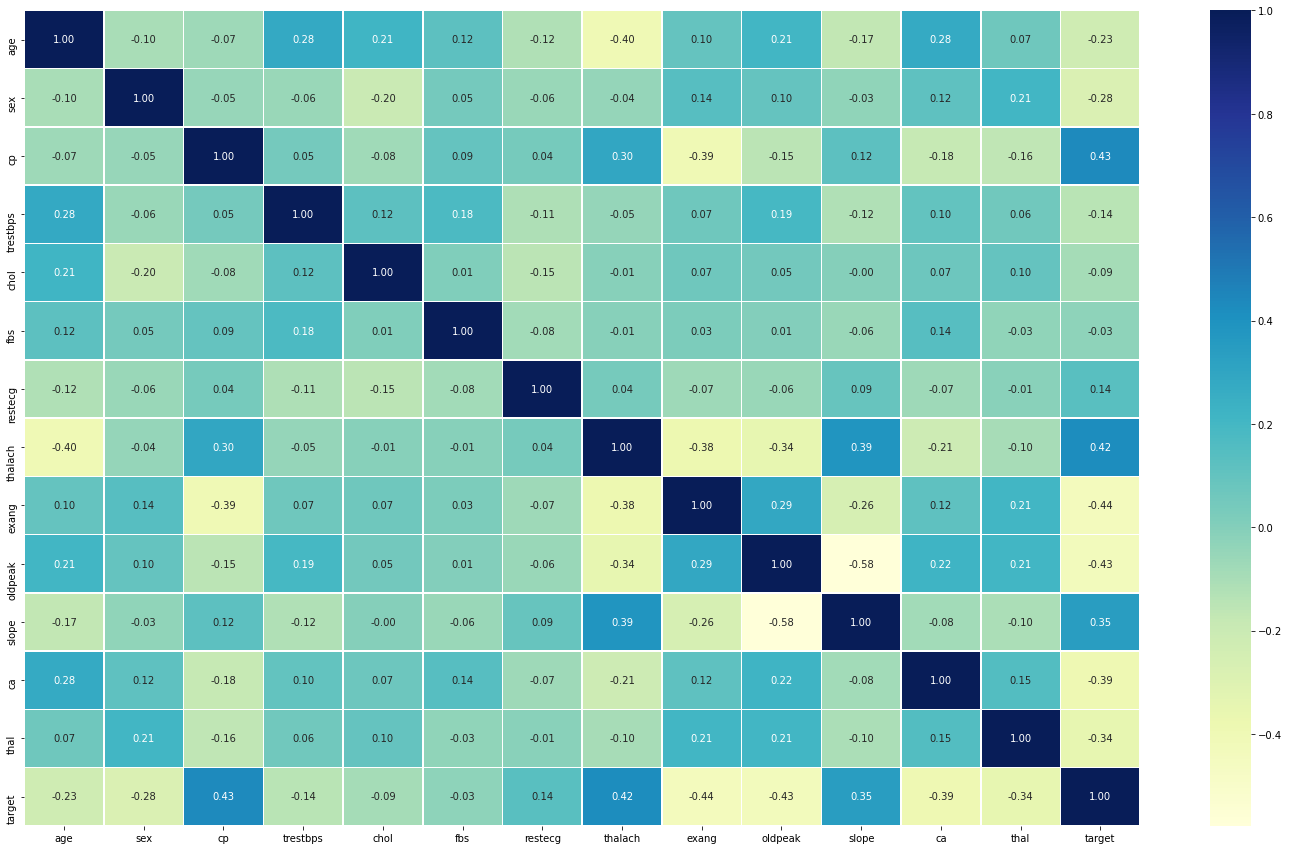

In [17]:
corr_matrix = df.corr()
fix, ax = plt.subplots(figsize=(25,15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap='YlGnBu')

## Modelovanje


In [73]:
x = df.drop('target', axis = 1)
y = df['target']

In [74]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3


In [75]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [76]:
np.random.seed(100)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [77]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
184,50,1,0,150,243,0,0,128,0,2.60,1,0,3
19,69,0,3,140,239,0,1,151,0,1.80,2,2,2
118,46,0,1,105,204,0,1,172,0,0.00,2,0,2
41,48,1,1,130,245,0,0,180,0,0.20,1,0,2
59,57,0,0,128,303,0,0,159,0,0.00,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,51,1,2,100,222,0,1,143,1,1.20,1,0,2
53,44,0,2,108,141,0,1,175,0,0.60,1,0,2
79,58,1,2,105,240,0,0,154,1,0.60,1,0,3
280,42,1,0,136,315,0,1,125,1,1.80,1,0,1


In [79]:
y_train

184    0
19     1
118    1
41     1
59     1
      ..
66     1
53     1
79     1
280    0
8      1
Name: target, Length: 242, dtype: int64

In [80]:
# Kreiramo dictionary sa modelima
models = { 
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
    }
# Kreiranje funkcije za treniranje i ocenjivanje modela
def fit_and_score(models, x_train, x_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}
  for name, model in models.items():
    model.fit(x_train, y_train)
    model_scores[name] = model.score(x_test, y_test)
  return model_scores

In [83]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6557377049180327,
 'Logistic Regression': 0.8524590163934426,
 'Naive Bayes': 0.8688524590163934,
 'Random Forest': 0.8524590163934426}

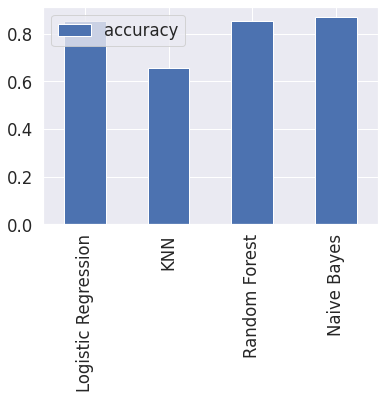

In [84]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [85]:
# Podesavanje parametara KNN-a
train_scores = []
test_scores = []
# Lista razlicitih vrednosti za K
neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(x_train,y_train)
  train_scores.append(knn.score(x_train, y_train))
  test_scores.append(knn.score(x_test,y_test))

In [86]:
test_scores

[0.639344262295082,
 0.5901639344262295,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.7704918032786885,
 0.7049180327868853,
 0.6885245901639344,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344]

Maximum KNN score on the test data: 77.05%


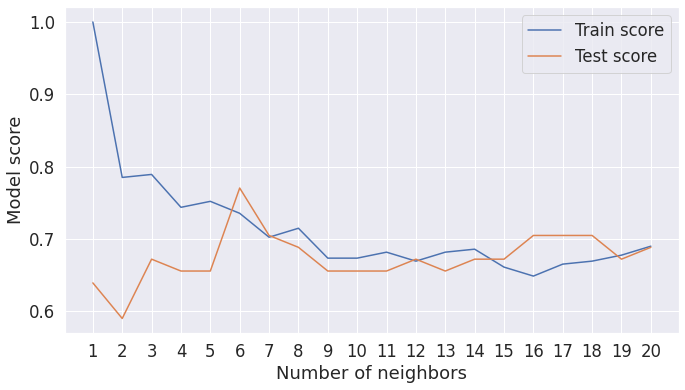

In [98]:
plt.figure(figsize = (11,6))
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Podesavanje parametara sa RandomizedSearchCV


In [99]:
# Kreiranje mreze hiperparametara za LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

# Kreiranje mreze hiperparametara za RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
            "max_depth":  [None, 10, 15, 20],
            "min_samples_split": np.arange(2,20,2),
            "min_samples_leaf": np.arange(1,20,2)}

In [100]:
# Podesavanje LogisticRegression klasifikatora
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [105]:
rs_log_reg.score(x_test,y_test)

0.8524590163934426

In [109]:
# Podesavanje Random Forest klasifikatora
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rf_grid, cv=5, n_iter=20, verbose=True)
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


In [110]:
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 9,
 'min_samples_split': 6,
 'n_estimators': 460}

In [111]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [113]:
# Predvidjanje na prilagodjenom modelu
y_preds = rs_log_reg.predict(x_test)

In [114]:
y_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [115]:
y_test

69     1
300    0
220    0
134    1
7      1
      ..
1      1
23     1
56     1
75     1
252    0
Name: target, Length: 61, dtype: int64

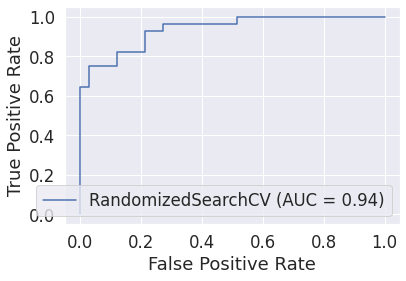

In [118]:
# Crtanje ROC krive i racunanjne AUC skora
plot_roc_curve(rs_log_reg, x_test, y_test);

In [40]:
# Konfuziona matrica
print(confusion_matrix(y_test,y_preds))

[[26  7]
 [ 2 26]]


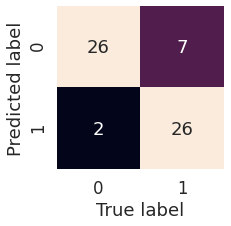

In [41]:
# Vizuelizacija konfuzione matrice
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test,y_preds):
  fig, ax = plt.subplots(figsize = (3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
  annot = True,
  cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")
plot_conf_mat(y_test, y_preds)

In [121]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



## Znacaj karakteristika (atributa)

In [128]:
rs_log_reg.best_params_
clf = LogisticRegression(C = 0.20433597178569418, solver = "liblinear")
clf.fit(x_train,y_train);

In [129]:
clf.coef_

array([[ 0.01973598, -0.84182354,  0.61182037, -0.0090716 , -0.00637396,
        -0.16616435,  0.14899371,  0.02714245, -0.41120558, -0.47727228,
         0.38535971, -0.60726985, -0.77119579]])

In [132]:
# Uporedjivanje koeficijente atributa sa kolonama
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.01973597704501033,
 'ca': -0.6072698505513333,
 'chol': -0.0063739601272038635,
 'cp': 0.6118203707024564,
 'exang': -0.4112055820667711,
 'fbs': -0.1661643511628185,
 'oldpeak': -0.47727227757039264,
 'restecg': 0.14899370740619788,
 'sex': -0.8418235437928052,
 'slope': 0.38535971486198467,
 'thal': -0.7711957923548832,
 'thalach': 0.02714244704999502,
 'trestbps': -0.009071595548132307}

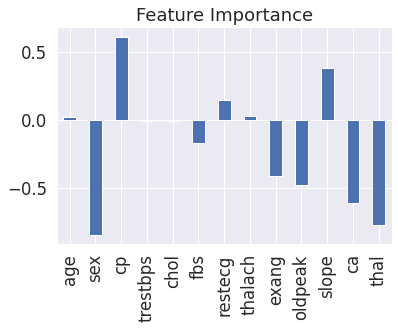

In [134]:
# Vizualizacija znacaja karakteristika
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);